
# 🛳 Titanic Survival Predictor

This project builds a **machine learning model** to predict passenger survival on the Titanic.
We will perform:

- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Building & Evaluation (Logistic Regression, Random Forest, SVM, Gradient Boosting)
- Business Insights
- Custom Passenger Survival Prediction


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [3]:

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:

# Check for Missing Values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  Exploratory Data Analysis

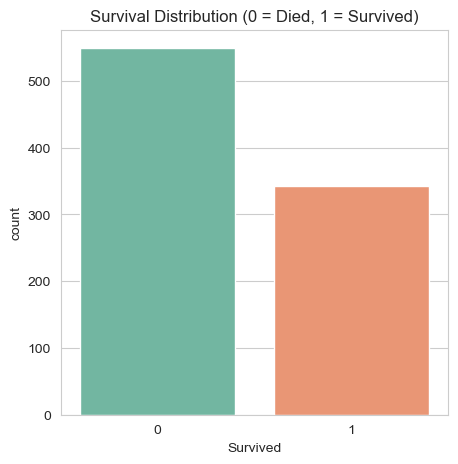

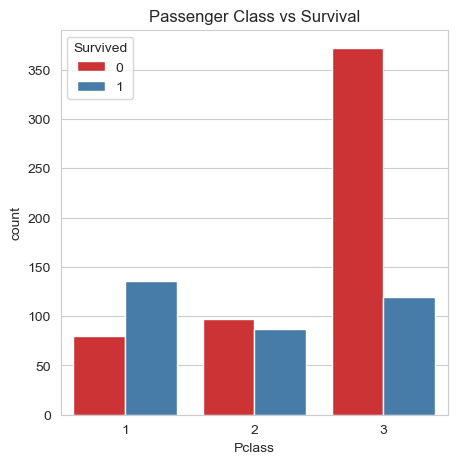

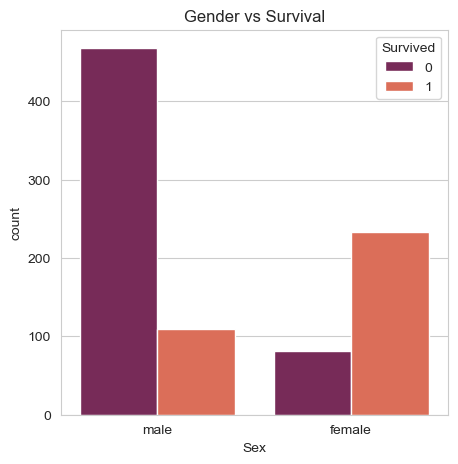

In [7]:

# Survival Count
plt.figure(figsize=(5,5))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.savefig('survival_count.png')
plt.show()

# Class vs Survival
plt.figure(figsize=(5,5))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set1")
plt.title("Passenger Class vs Survival")
plt.savefig('class_vs_survival.png')
plt.show()

# Gender vs Survival
plt.figure(figsize=(5,5))
sns.countplot(x="Sex", hue="Survived", data=df, palette="rocket")
plt.title("Gender vs Survival")
plt.savefig('gender_vs_survival.png')
plt.show()


##  Feature Engineering

In [9]:

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Extract Title from Name
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
df["Title"] = df["Title"].replace(['Lady', 'Countess','Capt','Col','Don','Dr',
                                   'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
df["Title"] = df["Title"].replace('Mlle', 'Miss')
df["Title"] = df["Title"].replace('Ms', 'Miss')
df["Title"] = df["Title"].replace('Mme', 'Mrs')

# Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Drop unneeded columns
df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)

# Encode categorical variables
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])
df["Title"] = label.fit_transform(df["Title"])

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2,2
1,1,1,0,38.0,1,0,71.2833,0,3,2
2,1,3,0,26.0,0,0,7.9250,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,3,2
4,0,3,1,35.0,0,0,8.0500,2,2,1


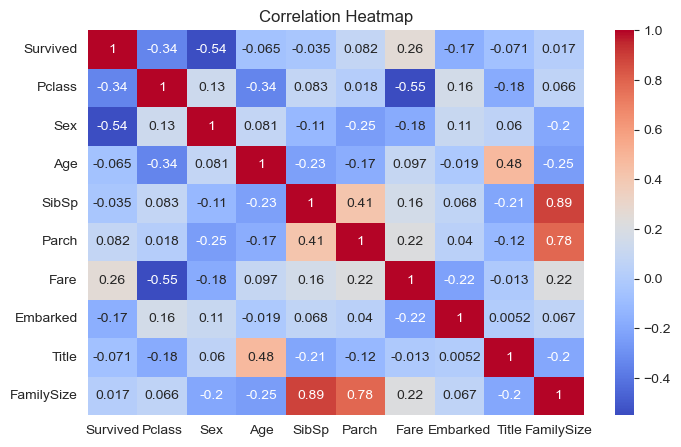

In [10]:

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png')

plt.show()


## Model Training

In [12]:

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.8045
Random Forest: 0.8212
SVM: 0.8324
Gradient Boosting: 0.8156


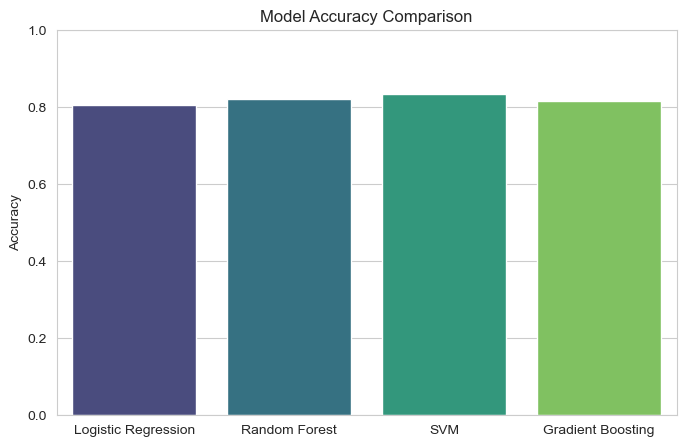

In [14]:

sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.savefig('model_comparison.png')

plt.show()


Best Model: SVM


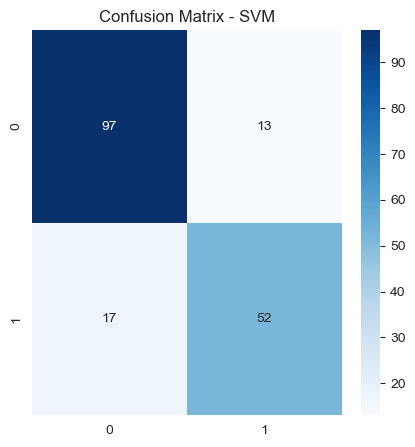

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [15]:

best_model = max(results, key=results.get)
print("Best Model:", best_model)

model = models[best_model]
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model}")
plt.savefig('confusion_matrix_{best_model}.png')

plt.show()

print(classification_report(y_test, y_pred))


Best Model: SVM


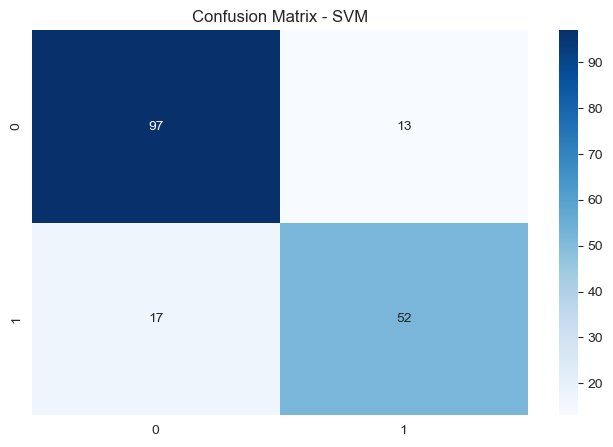

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [16]:

best_model = max(results, key=results.get)
print("Best Model:", best_model)

model = models[best_model]
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model}")
plt.show()

print(classification_report(y_test, y_pred))


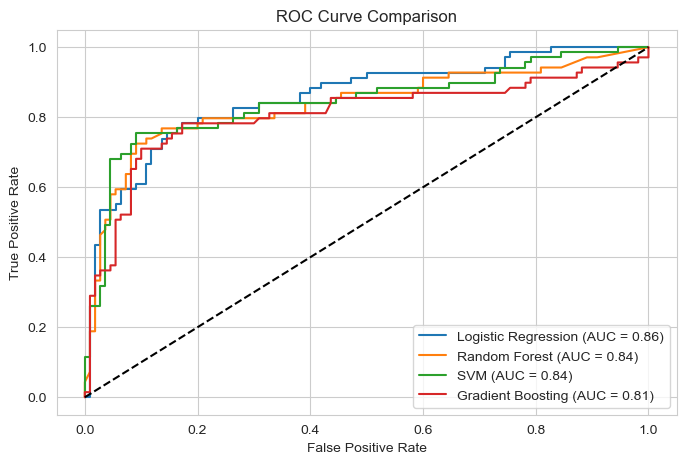

In [17]:

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")
    
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.savefig('roc_curve_comparison.png')
plt.legend()
plt.show()



##  Business Insights

- **Gender**: Females had a much higher survival rate compared to males.  
- **Class**: First-class passengers survived more often due to better access to lifeboats.  
- **Fare**: Higher fare (wealthier passengers) → better chances of survival.  
- **Age**: Younger passengers (children) had slightly better survival chances.  
- **Family**: Having a family onboard slightly increased survival probability.


## Predicting Survival for a New Passenger

In [20]:

# Example passenger data for prediction
sample_passenger = pd.DataFrame({
    'Pclass':[3],
    'Sex':[1], # 0 = female, 1 = male
    'Age':[22],
    'SibSp':[1],
    'Parch':[0],
    'Fare':[7.25],
    'Embarked':[2], # 0=C, 1=Q, 2=S (depends on encoding)
    'Title':[1], # Example encoding for Mr/Miss/Mrs
    'FamilySize':[2]
})

prediction = model.predict(sample_passenger)
print("Survival Prediction (1 = Survived, 0 = Not Survived):", prediction[0])


Survival Prediction (1 = Survived, 0 = Not Survived): 1
